# Gradient Descent

Once again, let's load pizzas and reservations from `pizza.txt`:

In [1]:
import numpy as np
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

Here are the `predict()` and `loss()` functions again:

In [2]:
def predict(X, w, b):
    return X * w + b

In [3]:
def loss(X, Y, w, b):
    predictions = predict(X, w, b)
    return np.average((predictions - Y) ** 2)

Now let's set `b` at 0, so that we have a 2-dimensional chart, and let's visualize how the loss changes as `w` changes. (By the way, don't worry about understanding the plotting code, unless you want to. This code isn't a requisite to follow this training.)

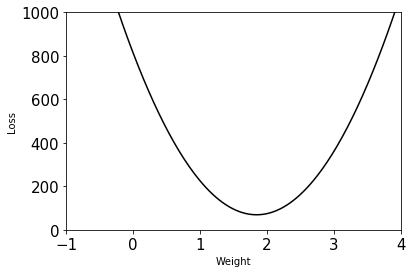

In [4]:
import matplotlib.pyplot as plt

# Draw matplotlib plots inside this notebook:
%matplotlib inline

# Compute losses for w ranging from -1 to 4:
weights = np.linspace(-1.0, 4.0, 200)
losses = [loss(X, Y, w, 0) for w in weights]

# Plot weights and losses:
plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Weight")
plt.ylabel("Loss")
plt.plot(weights, losses, color="black")

plt.show()

If we also consider `b`, then the loss becomes a surface, like this:

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Prepare matrices for 3D plot (W, B and L for weights, biases and losses):
MESH_SIZE = 20
weights = np.linspace(-1, 4, MESH_SIZE)
biases = np.linspace(-20, 20, MESH_SIZE)
W, B = np.meshgrid(weights, biases)
losses = np.array([loss(X, Y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))

# Plot surface:
ax = plt.figure().gca(projection="3d")
ax.set_xlabel("Weight", labelpad=15)
ax.set_ylabel("Bias", labelpad=15)
ax.set_zlabel("Loss", labelpad=15)
ax.plot_surface(W, B, L, cmap=cm.gnuplot, antialiased=True)

plt.show()

We want to implement gradient descent–and algorithm that descends the gradient of this curve. First, let's write a function to calculate the gradient. In mathematical formulae, the loss looks like this:

\begin{align*}
L = \frac{1}{m}\sum\limits_{i} ((wx_i + b) - y_i) ^ 2
\end{align*}

The gradient of this loss is the composition of the derivatives of `L` with respect to `w` and `b`. If you know calculus, then you can calculate those derivatives on your own. If you don't, then here they are:

\begin{align*}
\frac{\partial L}{\partial w} = \frac{1}{m}\sum\limits_{i} 2x((wx_i + b) - y_i)
\end{align*}

\begin{align*}
\frac{\partial L}{\partial b} = \frac{1}{m}\sum\limits_{i} 2((wx_i + b) - y_i)
\end{align*}

And here is a function that returns both derivatives:

In [ ]:
def gradient(X, Y, w, b):
    w_gradient = np.average(2 * X * (predict(X, w, b) - Y))
    b_gradient = np.average(2 * (predict(X, w, b) - Y))
    return (w_gradient, b_gradient)

In [ ]:
gradient(X, Y, 2, 3)

Now that we have `gradient()`, we can update `train()` to do gradient descent:

In [ ]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.6f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b

Let's run `train()`:

In [ ]:
w, b = train(X, Y, 10000, 0.001)

Here are the parameters `w` and `b`:

In [ ]:
w

In [ ]:
b

And finally, here are the pizzas we can expect to sell for 42 reservations:

In [ ]:
reservations = 42
predict(reservations, w, b)

If we round this up to the nearest integer, this calculation based on gradient descent came up with 59 pizzas, instead of the 60 that we calculated with the previous algorithm–and it was also faster!